## plotting After-process data || 25percent ||

In [6]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter
import matplotlib.pyplot as plt
import pandas as pd # v. 1.7
import numpy as np
import MySQLdb
import matplotlib.pyplot as plt
import pandas as pd
import sys
import time
import datetime 
import random
import statistics 
%matplotlib inline  


"""
unit >> bill
"""

import pandas as pd
import matplotlib.pyplot as plt
import MySQLdb
import time

from sympy import *
from sympy.solvers import solve
from sympy.parsing.sympy_parser import parse_expr

# x = raw_input('What about Ft?')
# Ft = float(x)
Ft = -0.048
t1 = 3.2484      # rate_1
t2 = 4.2218      # rate_2
t3 = 4.4217      # rate_3
ser = 38.22      # service_charge
u = symbols('u')

def bill(allpow):    
    ## Fundamental parameter
    if allpow == 0:
        bath = 0
    elif 1 <= allpow <= 150:
        bath = allpow*t1
    elif  151 <= allpow <= 400:
        power = allpow-150
        bath_1 = 150*t1
        bath_2 = power*t2
        bath = bath_1+bath_2
    else:
        power = allpow-150
        bath_1 = 150*t1
        power = power-250
        bath_2 = 250*t2
        bath_3 = power*t3
        bath = bath_1+bath_2+bath_3   
    service_price = 38.22  #permonth (fixed)   
    ## FT -33.2 satang/unit
    FT_price = allpow*Ft
    ## VAT 7%
    VAT_price = ((service_price+bath)+FT_price)*0.07
    bill = bath+service_price+FT_price+VAT_price
    return round(bill,2)

#### plotting month1 : October

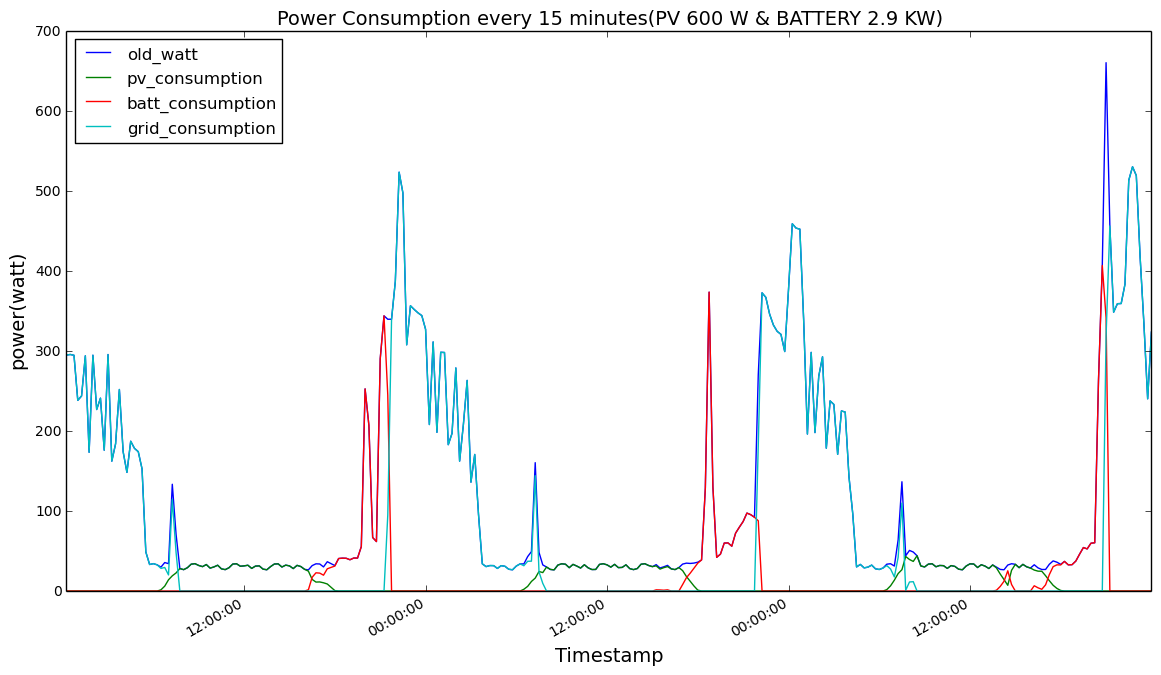

2016-10-01 00:00:00 to 2016-10-31 23:59:59
Total unit consumption || No-algorithm || equal to 383.111085 kW equal to 1595.63 bath
Total unit consumption || algorithm + PV&BATT ||equal to 383.111085 kW equal to 1595.63 bath
Total power consumption from PEA equal to 288.614398959 kW equal to 1173.61 bath
Total predicted watt 382.9847962
Total target watt 297.70956225
Total watt 248.94011753
Total PV_genaration 95.4908794189


In [7]:
conn= MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

time_a = '2016-10-18 00:00:00'
time_b = '2016-10-20 23:59:59'

query= "SELECT Timestamp,old_watt,pv_consumption,batt_consumption,grid_consumption FROM thesis.Prac_main25 WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; " % (time_a,time_b)
df = pd.read_sql(query, conn,index_col=['Timestamp'])
fig, ax = plt.subplots(figsize=(14*1, 8))
ax.set_title('Power Consumption every 15 minutes(PV 600 W & BATTERY 2.9 KW)', fontsize=14)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('power(watt)', fontsize=14)
df.plot(ax=ax)
plt.show()

d = 31
time_a = pd.date_range('2016-10-01 00:00:00', periods=96*d, freq='15T')
time_b = pd.date_range('2016-10-01 00:14:59', periods=96*d, freq='15T')
conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()
print time_a[0],"to",time_b[-1]
query0 = "SELECT * FROM thesis.Prac_main25 WHERE Timestamp >= '%s'AND  Timestamp <= '%s'; "% (time_a[0],time_b[-1])
df = pd.read_sql(query0, conn)
print "Total unit consumption || No-algorithm || equal to",df.old_watt.sum()/1000,"kW equal to", bill(df.old_watt.sum()/1000),"bath"
print "Total unit consumption || algorithm + PV&BATT ||equal to",df.watt.sum()/1000,"kW equal to", bill(df.watt.sum()/1000),"bath"
print "Total power consumption from PEA equal to",df.grid_consumption.sum()/1000,"kW equal to", bill(df.grid_consumption.sum()/1000),"bath"
print "Total predicted watt", df.predicted_watt.sum()/1000
print "Total target watt", df.target_watt.sum()/1000
print "Total watt", df.predicted_watt.sum()/1000*(1.0-0.35)
print "Total PV_genaration", df.PV_genarator.sum()/1000 

#### plotting month2 : November

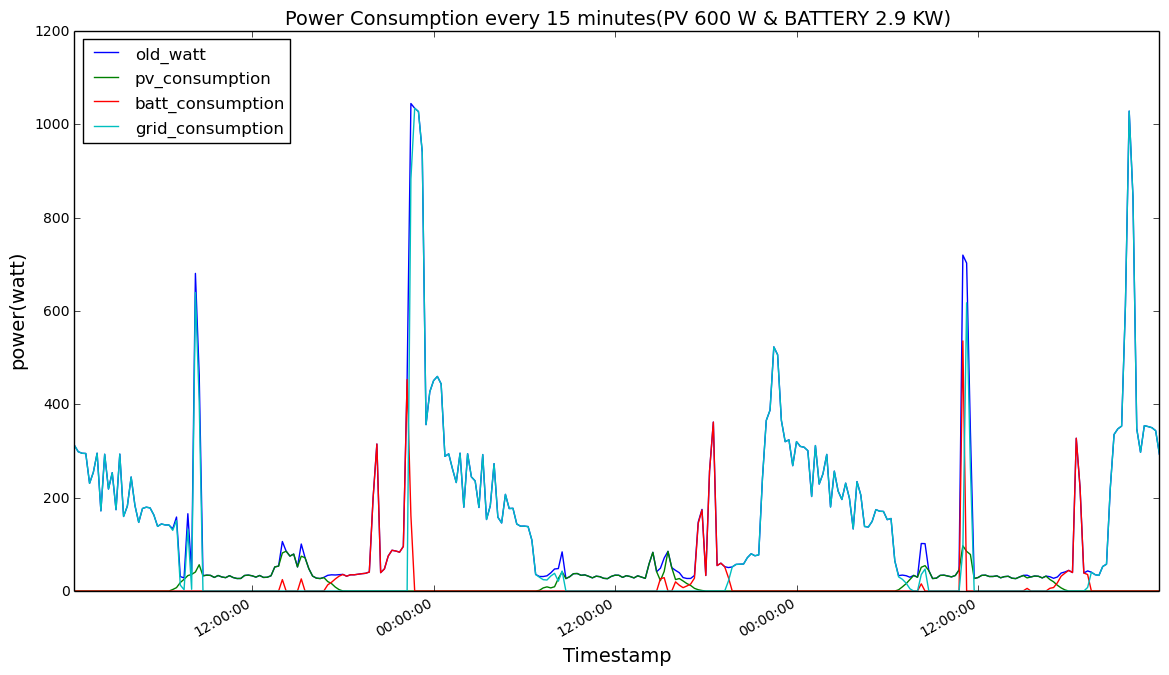

2016-11-01 00:00:00 to 2016-11-30 23:59:59
Total unit consumption || No-algorithm || equal to 386.4451217 kW equal to 1610.52 bath
Total unit consumption || algorithm + PV&BATT ||equal to 386.4451217 kW equal to 1610.52 bath
Total power consumption from PEA equal to 296.28222254 kW equal to 1207.85 bath
Total predicted watt 386.2071516
Total target watt 298.378134
Total watt 251.03464854
Total PV_genaration 94.11936232


In [8]:
conn= MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

time_a = '2016-11-18 00:00:00'
time_b = '2016-11-20 23:59:59'

query= "SELECT Timestamp,old_watt,pv_consumption,batt_consumption,grid_consumption FROM thesis.Prac_main25 WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; " % (time_a,time_b)
df = pd.read_sql(query, conn,index_col=['Timestamp'])
fig, ax = plt.subplots(figsize=(14*1, 8))
ax.set_title('Power Consumption every 15 minutes(PV 600 W & BATTERY 2.9 KW)', fontsize=14)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('power(watt)', fontsize=14)
df.plot(ax=ax)
plt.show()

d = 30
time_a = pd.date_range('2016-11-01 00:00:00', periods=96*d, freq='15T')
time_b = pd.date_range('2016-11-01 00:14:59', periods=96*d, freq='15T')
conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()
print time_a[0],"to",time_b[-1]
query0 = "SELECT * FROM thesis.Prac_main25 WHERE Timestamp >= '%s'AND  Timestamp <= '%s'; "% (time_a[0],time_b[-1])
df = pd.read_sql(query0, conn)
print "Total unit consumption || No-algorithm || equal to",df.old_watt.sum()/1000,"kW equal to", bill(df.old_watt.sum()/1000),"bath"
print "Total unit consumption || algorithm + PV&BATT ||equal to",df.watt.sum()/1000,"kW equal to", bill(df.watt.sum()/1000),"bath"
print "Total power consumption from PEA equal to",df.grid_consumption.sum()/1000,"kW equal to", bill(df.grid_consumption.sum()/1000),"bath"
print "Total predicted watt", df.predicted_watt.sum()/1000
print "Total target watt", df.target_watt.sum()/1000
print "Total watt", df.predicted_watt.sum()/1000*(1.0-0.35)
print "Total PV_genaration", df.PV_genarator.sum()/1000 

#### plotting month3 : DECEMBER

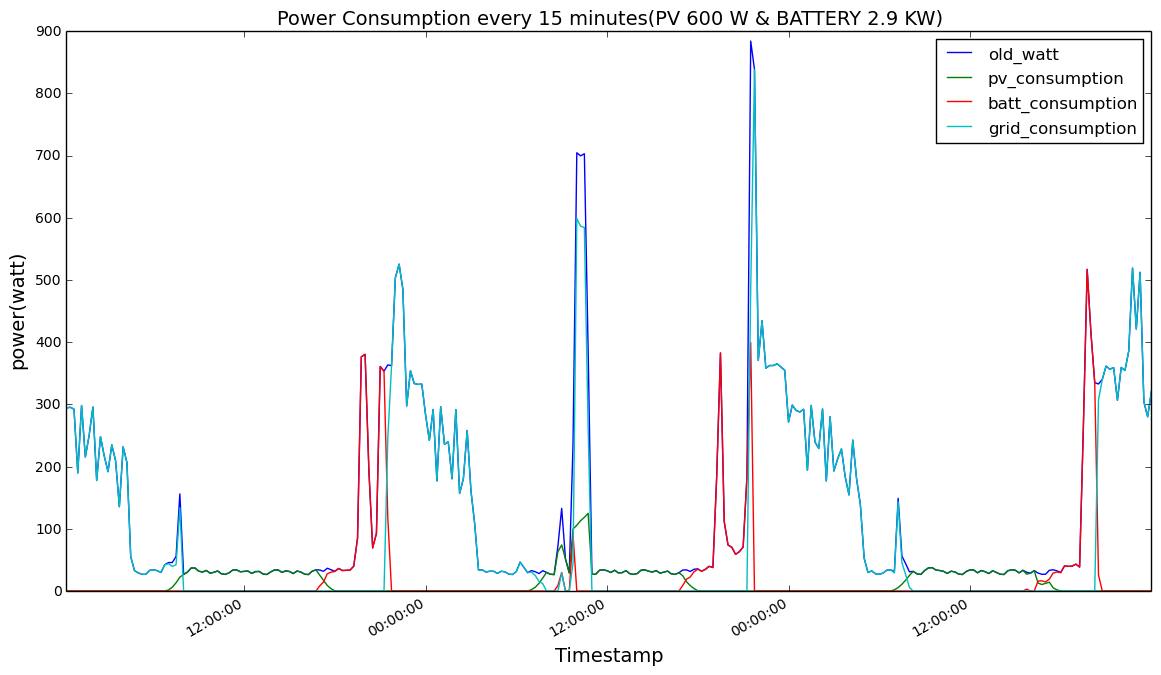

2016-12-01 00:00:00 to 2016-12-31 23:59:59
Total unit consumption || No-algorithm || equal to 404.8734149 kW equal to 1693.86 bath
Total unit consumption || algorithm + PV&BATT ||equal to 404.8734149 kW equal to 1693.86 bath
Total power consumption from PEA equal to 310.782840661 kW equal to 1272.61 bath
Total predicted watt 405.36069708
Total target watt 309.7362065
Total watt 263.484453102
Total PV_genaration 97.03365


In [9]:
conn= MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

time_a = '2016-12-18 00:00:00'
time_b = '2016-12-20 23:59:59'

query= "SELECT Timestamp,old_watt,pv_consumption,batt_consumption,grid_consumption FROM thesis.Prac_main25 WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; " % (time_a,time_b)
df = pd.read_sql(query, conn,index_col=['Timestamp'])
fig, ax = plt.subplots(figsize=(14*1, 8))
ax.set_title('Power Consumption every 15 minutes(PV 600 W & BATTERY 2.9 KW)', fontsize=14)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('power(watt)', fontsize=14)
df.plot(ax=ax)
plt.show()

d = 31
time_a = pd.date_range('2016-12-01 00:00:00', periods=96*d, freq='15T')
time_b = pd.date_range('2016-12-01 00:14:59', periods=96*d, freq='15T')
conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()
print time_a[0],"to",time_b[-1]
query0 = "SELECT * FROM thesis.Prac_main25 WHERE Timestamp >= '%s'AND  Timestamp <= '%s'; "% (time_a[0],time_b[-1])
df = pd.read_sql(query0, conn)
print "Total unit consumption || No-algorithm || equal to",df.old_watt.sum()/1000,"kW equal to", bill(df.old_watt.sum()/1000),"bath"
print "Total unit consumption || algorithm + PV&BATT ||equal to",df.watt.sum()/1000,"kW equal to", bill(df.watt.sum()/1000),"bath"
print "Total power consumption from PEA equal to",df.grid_consumption.sum()/1000,"kW equal to", bill(df.grid_consumption.sum()/1000),"bath"
print "Total predicted watt", df.predicted_watt.sum()/1000
print "Total target watt", df.target_watt.sum()/1000
print "Total watt", df.predicted_watt.sum()/1000*(1.0-0.35)
print "Total PV_genaration", df.PV_genarator.sum()/1000 

#### plotting month4 : JANUARY

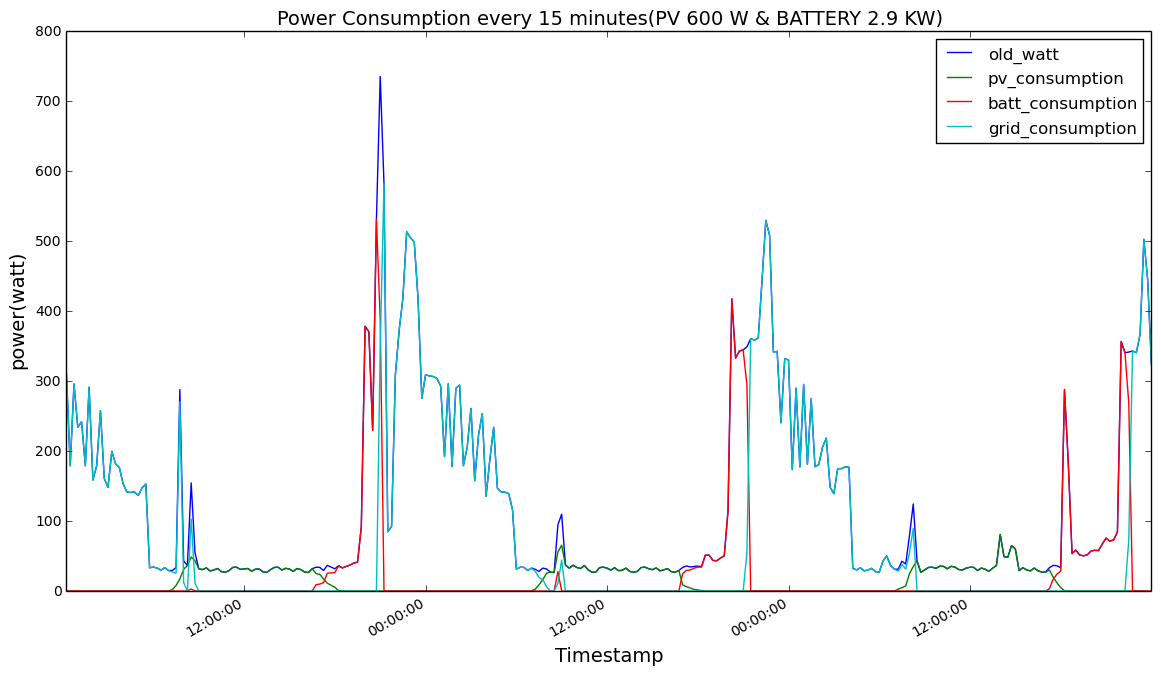

2017-01-01 00:00:00 to 2017-01-31 23:59:59
Total unit consumption || No-algorithm || equal to 399.8333564 kW equal to 1670.31 bath
Total unit consumption || algorithm + PV&BATT ||equal to 396.1787985 kW equal to 1653.99 bath
Total power consumption from PEA equal to 307.054096965 kW equal to 1255.96 bath
Total predicted watt 396.0933781
Total target watt 306.2251788
Total watt 257.460695765
Total PV_genaration 92.9763


In [13]:
conn= MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

time_a = '2017-01-18 00:00:00'
time_b = '2017-01-20 23:59:59'

query= "SELECT Timestamp,old_watt,pv_consumption,batt_consumption,grid_consumption FROM thesis.Prac_main25 WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; " % (time_a,time_b)
df = pd.read_sql(query, conn,index_col=['Timestamp'])
fig, ax = plt.subplots(figsize=(14*1, 8))
ax.set_title('Power Consumption every 15 minutes(PV 600 W & BATTERY 2.9 KW)', fontsize=14)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('power(watt)', fontsize=14)
df.plot(ax=ax)
plt.show()

d = 31
time_a = pd.date_range('2017-01-01 00:00:00', periods=96*d, freq='15T')
time_b = pd.date_range('2017-01-01 00:14:59', periods=96*d, freq='15T')
conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()
print time_a[0],"to",time_b[-1]
query0 = "SELECT * FROM thesis.Prac_main25 WHERE Timestamp >= '%s'AND  Timestamp <= '%s'; "% (time_a[0],time_b[-1])
df = pd.read_sql(query0, conn)
print "Total unit consumption || No-algorithm || equal to",df.old_watt.sum()/1000,"kW equal to", bill(df.old_watt.sum()/1000),"bath"
print "Total unit consumption || algorithm + PV&BATT ||equal to",df.watt.sum()/1000,"kW equal to", bill(df.watt.sum()/1000),"bath"
print "Total power consumption from PEA equal to",df.grid_consumption.sum()/1000,"kW equal to", bill(df.grid_consumption.sum()/1000),"bath"
print "Total predicted watt", df.predicted_watt.sum()/1000
print "Total target watt", df.target_watt.sum()/1000
print "Total watt", df.predicted_watt.sum()/1000*(1.0-0.35)
print "Total PV_genaration", df.PV_genarator.sum()/1000 

#### plotting month5 : FEBRUAY

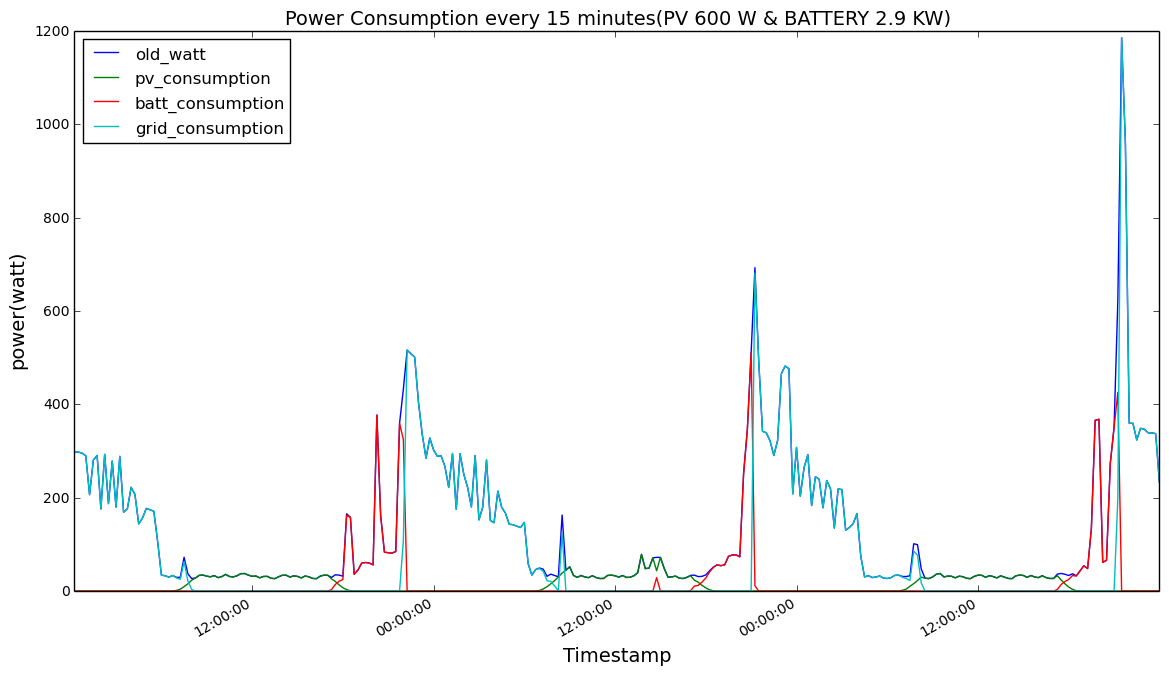

2017-02-01 00:00:00 to 2017-02-28 23:59:59
Total unit consumption || No-algorithm || equal to 342.6839014 kW equal to 1415.08 bath
Total unit consumption || algorithm + PV&BATT ||equal to 342.6839014 kW equal to 1415.08 bath
Total power consumption from PEA equal to 251.88421802 kW equal to 1009.57 bath
Total predicted watt 342.705114462
Total target watt 268.252303482
Total watt 222.7583244
Total PV_genaration 95.577225


In [11]:
conn= MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

time_a = '2017-02-18 00:00:00'
time_b = '2017-02-20 23:59:59'

query= "SELECT Timestamp,old_watt,pv_consumption,batt_consumption,grid_consumption FROM thesis.Prac_main25 WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; " % (time_a,time_b)
df = pd.read_sql(query, conn,index_col=['Timestamp'])
fig, ax = plt.subplots(figsize=(14*1, 8))
ax.set_title('Power Consumption every 15 minutes(PV 600 W & BATTERY 2.9 KW)', fontsize=14)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('power(watt)', fontsize=14)
df.plot(ax=ax)
plt.show()

d = 28
time_a = pd.date_range('2017-02-01 00:00:00', periods=96*d, freq='15T')
time_b = pd.date_range('2017-02-01 00:14:59', periods=96*d, freq='15T')
conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()
print time_a[0],"to",time_b[-1]
query0 = "SELECT * FROM thesis.Prac_main25 WHERE Timestamp >= '%s'AND  Timestamp <= '%s'; "% (time_a[0],time_b[-1])
df = pd.read_sql(query0, conn)
print "Total unit consumption || No-algorithm || equal to",df.old_watt.sum()/1000,"kW equal to", bill(df.old_watt.sum()/1000),"bath"
print "Total unit consumption || algorithm + PV&BATT ||equal to",df.watt.sum()/1000,"kW equal to", bill(df.watt.sum()/1000),"bath"
print "Total power consumption from PEA equal to",df.grid_consumption.sum()/1000,"kW equal to", bill(df.grid_consumption.sum()/1000),"bath"
print "Total predicted watt", df.predicted_watt.sum()/1000
print "Total target watt", df.target_watt.sum()/1000
print "Total watt", df.predicted_watt.sum()/1000*(1.0-0.35)
print "Total PV_genaration", df.PV_genarator.sum()/1000 

#### plotting month6 : MARCH

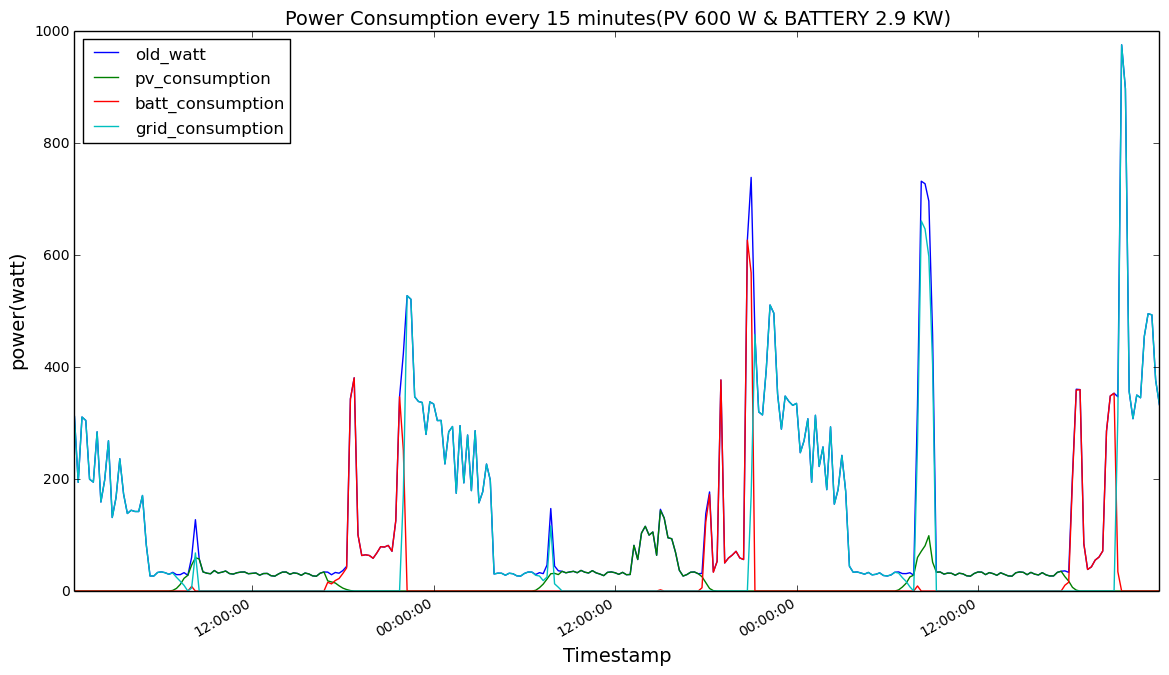

2017-03-01 00:00:00 to 2017-03-31 23:59:59
Total unit consumption || No-algorithm || equal to 390.4722818 kW equal to 1628.5 bath
Total unit consumption || algorithm + PV&BATT ||equal to 390.4722818 kW equal to 1628.5 bath
Total power consumption from PEA equal to 283.72407407 kW equal to 1151.77 bath
Total predicted watt 390.4630029
Total target watt 307.0110577
Total watt 253.800951885
Total PV_genaration 114.374025


In [12]:
conn= MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

time_a = '2017-03-18 00:00:00'
time_b = '2017-03-20 23:59:59'

query= "SELECT Timestamp,old_watt,pv_consumption,batt_consumption,grid_consumption FROM thesis.Prac_main25 WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; " % (time_a,time_b)
df = pd.read_sql(query, conn,index_col=['Timestamp'])
fig, ax = plt.subplots(figsize=(14*1, 8))
ax.set_title('Power Consumption every 15 minutes(PV 600 W & BATTERY 2.9 KW)', fontsize=14)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('power(watt)', fontsize=14)
df.plot(ax=ax)
plt.show()

d = 31
time_a = pd.date_range('2017-03-01 00:00:00', periods=96*d, freq='15T')
time_b = pd.date_range('2017-03-01 00:14:59', periods=96*d, freq='15T')
conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()
print time_a[0],"to",time_b[-1]
query0 = "SELECT * FROM thesis.Prac_main25 WHERE Timestamp >= '%s'AND Timestamp <= '%s'; "% (time_a[0],time_b[-1])
df = pd.read_sql(query0, conn)
print "Total unit consumption || No-algorithm || equal to",df.old_watt.sum()/1000,"kW equal to", bill(df.old_watt.sum()/1000),"bath"
print "Total unit consumption || algorithm + PV&BATT ||equal to",df.watt.sum()/1000,"kW equal to", bill(df.watt.sum()/1000),"bath"
print "Total power consumption from PEA equal to",df.grid_consumption.sum()/1000,"kW equal to", bill(df.grid_consumption.sum()/1000),"bath"
print "Total predicted watt", df.predicted_watt.sum()/1000
print "Total target watt", df.target_watt.sum()/1000
print "Total watt", df.predicted_watt.sum()/1000*(1.0-0.35)
print "Total PV_genaration", df.PV_genarator.sum()/1000 